# **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# **Reading Data**

In [ ]:
df = pd.read_excel("/content/Effective labour market exit age.xlsx")

Q1. What is the summary and statistics of data.

In [ ]:
df.head()

,COU,Country,IND,Indicator,Gender,Year,Average Age
0,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,1970,65.7
1,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,1980,62.7
2,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,1990,61.1
3,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2000,60.6
4,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2005,62.1


In [ ]:
df.tail()

,COU,Country,IND,Indicator,Gender,Year,Average Age
1170,EU27,European Union (27 countries),PEN19A,"Effective labour market exit age, men",men,2016,62.3
1171,EU27,European Union (27 countries),PEN19A,"Effective labour market exit age, men",men,2017,62.6
1172,EU27,European Union (27 countries),PEN19A,"Effective labour market exit age, men",men,2018,62.9
1173,EU27,European Union (27 countries),PEN19A,"Effective labour market exit age, men",men,2019,63.1
1174,EU27,European Union (27 countries),PEN19A,"Effective labour market exit age, men",men,2020,63.1


In [ ]:
df.shape

(1175, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COU          1175 non-null   object 
 1   Country      1175 non-null   object 
 2   IND          1175 non-null   object 
 3   Indicator    1175 non-null   object 
 4   Gender       1175 non-null   object 
 5   Year         1175 non-null   int64  
 6   Average Age  1175 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 64.4+ KB


Observation:-

* As we can see the data has no missing values.
* We have 1175 records in total & 7 idependent features.


In [ ]:
df['Average Age'].describe()

count    1175.000000
mean       62.631489
std         3.235645
min        51.100000
25%        60.450000
50%        62.500000
75%        64.500000
max        78.600000
Name: Average Age, dtype: float64

In [ ]:
df['COU'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'SVN', 'OAVG', 'LVA',
       'ARG', 'BRA', 'CHN', 'IND', 'IDN', 'LTU', 'RUS', 'SAU', 'ZAF',
       'BGR', 'COL', 'CRI', 'HRV', 'CYP', 'MLT', 'ROU', 'EU27'],
      dtype=object)

Q2. What is the count of total countries in our dataset.

In [ ]:
df['Country'].unique()


array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Slovenia', 'OECD - Average', 'Latvia', 'Argentina',
       'Brazil', "China (People's Republic of)", 'India', 'Indonesia',
       'Lithuania', 'Russia', 'Saudi Arabia', 'South Africa', 'Bulgaria',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Malta', 'Romania',
       'European Union (27 countries)'], dtype=object)

In [ ]:
df['Country'].unique()
print(f"We have in total {len(df['Country'].unique())} countries in our dataset")

We have in total 53 countries in our dataset


Q3. What is the average retirement age with respect to gender ?

In [ ]:
fig = px.histogram(df, x="Average Age", color='Gender', histfunc='avg')
fig.show()

In [ ]:
# Plotly violin plot for different genders
fig_gender_violin = px.violin(df, x="Gender", y="Average Age", color="Gender", title="Distribution of Average Age by Gender")
fig_gender_violin.update_traces(marker=dict(size=3))  # Adjust marker size for better visibility
fig_gender_violin.show()

In [ ]:
df.groupby(by='Gender')['Average Age'].mean()

Gender
men      63.486050
women    61.754828
Name: Average Age, dtype: float64

An average man exits the market at the age of 63-64 years, while a woman exits the market at the age of 61-62 years

Q4. What is the trend in retirement ages in last 6 decades genderwise ?


In [ ]:
# Plotly scatter plot for different genders
fig_gender = px.scatter(df, x="Year", y="Average Age", color="Gender", title="Average Age of Labor Market Exit by Gender")
fig_gender.show()

In [ ]:
df.groupby(by=['Gender', 'Year'])['Average Age'].mean().sort_values(ascending=False)[0:2]

Gender  Year
men     1970    66.233333
women   1970    64.837143
Name: Average Age, dtype: float64

Q5. What is the trend in retirement ages in different nations genderwise in past 6 decades ?

In [ ]:
fig = px.line(df, x="Year", y="Average Age", color='Country', title="Average Age of Labor Market Exit by Country")
fig.show()

In [ ]:
df.groupby(by=['Gender','Country'])['Average Age'].mean().sort_values(ascending=False)

Gender  Country        
men     Mexico             69.358333
        Indonesia          69.220000
        Colombia           68.833333
women   Indonesia          68.580000
men     Iceland            67.658333
                             ...    
women   Belgium            58.616667
        Slovenia           58.600000
        Croatia            58.144444
        Slovak Republic    58.141667
        Saudi Arabia       52.112500
Name: Average Age, Length: 105, dtype: float64

Q6. What is distribution of average ages over different nations ?

In [ ]:
# Plotly box plot for different countries
fig_country_box = px.box(df, x="Country", y="Average Age", color="Country", title="Distribution of Average Age by Country")
fig_country_box.update_traces(marker=dict(size=3))  # Adjust marker size for better visibility
fig_country_box.show()

Q7. What is the average age of labor market exit for each year globally ?

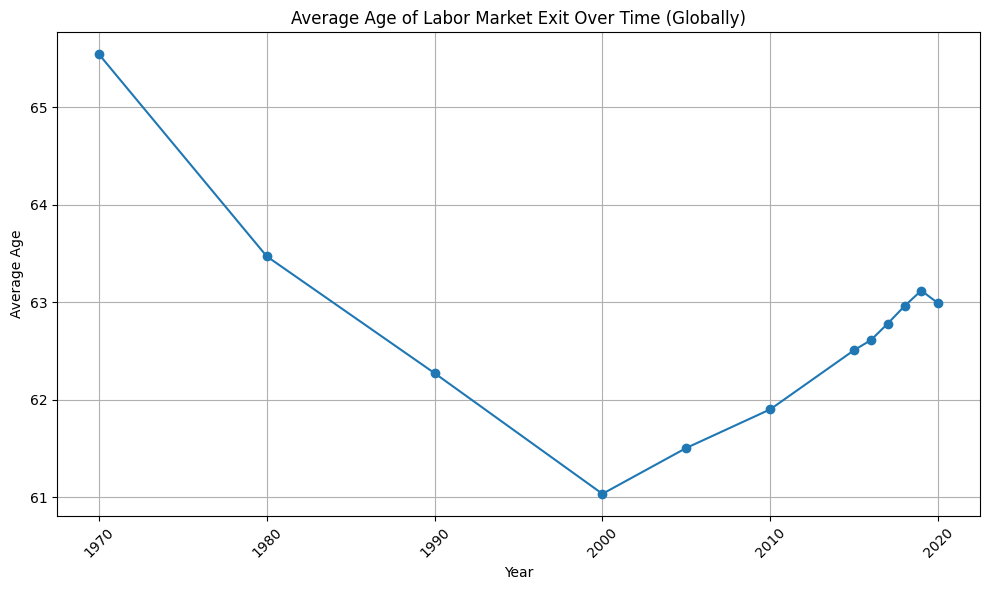

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

global_avg_age = df.groupby('Year')['Average Age'].mean()

plt.figure(figsize=(10, 6))
plt.plot(global_avg_age.index, global_avg_age.values, marker='o', linestyle='-')
plt.title('Average Age of Labor Market Exit Over Time (Globally)')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q8. Which are the countries with highest and lowest average ages for labor market exit ?

In [ ]:
# Calculate summary statistics
country_stats = df.groupby('Country')['Average Age'].agg(['mean', 'median', 'min', 'max'])

# Identify countries with higher/lower average ages
highest_avg_age_countries = country_stats[country_stats['mean'] == country_stats['mean'].max()]
lowest_avg_age_countries = country_stats[country_stats['mean'] == country_stats['mean'].min()]

# Print countries with higher average ages
print("Countries with higher average ages of labor market exit:")
print(highest_avg_age_countries)

# Print countries with lower average ages
print("\nCountries with lower average ages of labor market exit:")
print(lowest_avg_age_countries)

Countries with higher average ages of labor market exit:
           mean  median   min   max
Country                            
Indonesia  68.9   68.65  63.9  71.3

Countries with lower average ages of labor market exit:
                   mean  median   min   max
Country                                    
Saudi Arabia  58.164706    58.9  51.1  66.3


Q9. What is the Effective Labor Market Exit Age around globe ?

In [ ]:
fig = px.choropleth(df, locations="COU", color="Average Age", hover_name="Country", animation_frame="Year", range_color=[50, 70], title="Effective Labor Market Exit Age")
fig.show()